In [1]:
########################################################################################
########### Team Memebers : Aqeel Azam and Seyed Mohammad Hossein Tabatabaei Ashkezari
#########################################################################################

                                                        #STEP 1

                                  # Inspect Dataset and Print and Plot Results Functions
                                  ###################################################### 
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from sklearn.calibration import label_binarize
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import SMOTE



import gdown

file_url = "https://drive.google.com/uc?id=1GbSwxXyRnevFH2WmIk3C0sT6a8x1fFd1"
output = 'ML_FinalPrj/incident_event_log.csv'

gdown.download(file_url, output, quiet=False)

# Load the dataset
df = pd.read_csv('ML_FinalPrj/incident_event_log.csv')
categorical_columns = df.select_dtypes(include=['object']).columns

priority_class_ratio = df.groupby('priority').size() / len(df)
print(f"Class Ratios for 'priority' column:\n{priority_class_ratio}\n")



def dataframe_info(df):
    """ Function to extract and display information about each column of the dataframe """
    # Calculate the percentage of missing values for each column
    missing_percentage = (df == '?').mean() * 100

    # Create a DataFrame that includes the required information
    info_df = pd.DataFrame({
        'Header': df.columns,
        'Type': df.dtypes,
        'Non-Null Count': df.shape[0] - (df == '?').sum(),
        'Missing Value %': (df == '?').mean() * 100
    })

    # Reset the index for better readability
    return info_df.reset_index(drop=True)

info_df = dataframe_info(df)

print (info_df)

# Categorize features based on their missing value percentages
high_missing_features = info_df[info_df['Missing Value %'] > 50]['Header'].tolist()
moderate_missing_features = info_df[(info_df['Missing Value %'] <= 50) & (info_df['Missing Value %'] >= 20)]['Header'].tolist()
low_missing_features = info_df[info_df['Missing Value %'] < 20]['Header'].tolist()
print("\n")
print("categories of features based on missing values:\n")
print("High Missing Value Features:", high_missing_features)
print("Moderate Missing Value Features:", moderate_missing_features)
print("Low Missing Value Features:", low_missing_features)


# Function to print results
def print_results(label, results):
    accuracy, precision, recall, f1, cv_scores, class_report, conf_matrix,roc_auc,training_time = results
    print(f"--- {label} ---")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Average CV Score: {np.mean(cv_scores):.4f}\n")
    print("Classification Report:\n", class_report)
    print("Confusion Matrix:\n", conf_matrix)
    print(f"ROC-AUC Score: {roc_auc:.4f}")
    print(f"Training Time: {training_time:.2f} seconds\n")
    print("\n")


def plot_multi_class_roc_curve(y_true, y_pred_proba, n_classes, title='Multi-class ROC'):
    # Binarize the output labels for each class
    y_true_bin = label_binarize(y_true, classes=range(n_classes))
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Interpolate all ROC curves at these points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Average it and compute AUC
    mean_tpr /= n_classes

    plt.figure()
    plt.plot(all_fpr, mean_tpr, color='darkorange', lw=2,
             label='Average ROC curve (area = {0:0.2f})'.format(np.mean(list(roc_auc.values()))))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()





Class Ratios for 'priority' column:
priority
1 - Critical    0.015934
2 - High        0.020972
3 - Moderate    0.934656
4 - Low         0.028438
dtype: float64

                     Header    Type  Non-Null Count  Missing Value %
0                    number  object          141712         0.000000
1            incident_state  object          141712         0.000000
2                    active    bool          141712         0.000000
3        reassignment_count   int64          141712         0.000000
4              reopen_count   int64          141712         0.000000
5             sys_mod_count   int64          141712         0.000000
6                  made_sla    bool          141712         0.000000
7                 caller_id  object          141683         0.020464
8                 opened_by  object          136877         3.411849
9                 opened_at  object          141712         0.000000
10           sys_created_by  object           88636        37.453427
11         

--- RF: Results with Imputed Features ---
Accuracy: 0.9840172176551529
Precision: 0.9837246996985182
Recall: 0.9840172176551529
F1-Score: 0.9836629089558782
Cross-validation scores: [0.9925072  0.99787603 0.99820643 0.99789963 0.99812383]
Average CV Score: 0.9969

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       459
           1       0.93      0.75      0.83       603
           2       0.99      0.99      0.99     26518
           3       0.88      0.88      0.88       763

    accuracy                           0.98     28343
   macro avg       0.92      0.88      0.90     28343
weighted avg       0.98      0.98      0.98     28343

Confusion Matrix:
 [[  406     0    46     7]
 [    8   451   141     3]
 [   36    36 26364    82]
 [    1     0    93   669]]
ROC-AUC Score: 0.9949
Training Time: 140.87 seconds





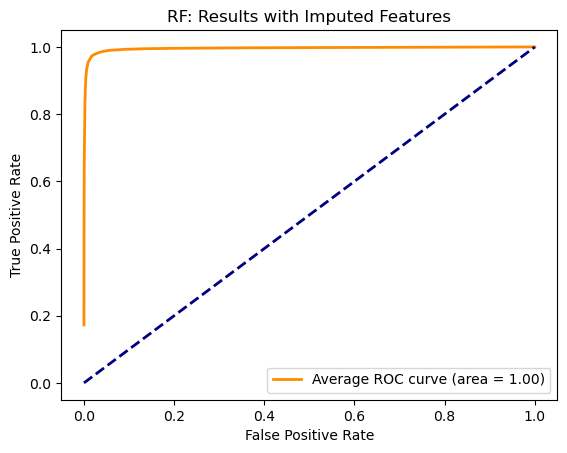

--- RF: Results with Removed Features ---
Accuracy: 0.9832410118900611
Precision: 0.9827972113656719
Recall: 0.9832410118900611
F1-Score: 0.9827698383297023
Cross-validation scores: [0.9922476  0.99793503 0.99835982 0.99797043 0.99806483]
Average CV Score: 0.9969

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.81      0.86       459
           1       0.93      0.75      0.83       603
           2       0.99      0.99      0.99     26518
           3       0.89      0.87      0.88       763

    accuracy                           0.98     28343
   macro avg       0.93      0.86      0.89     28343
weighted avg       0.98      0.98      0.98     28343

Confusion Matrix:
 [[  373     0    79     7]
 [    7   454   140     2]
 [   29    36 26379    74]
 [    1     0   100   662]]
ROC-AUC Score: 0.9942
Training Time: 144.47 seconds





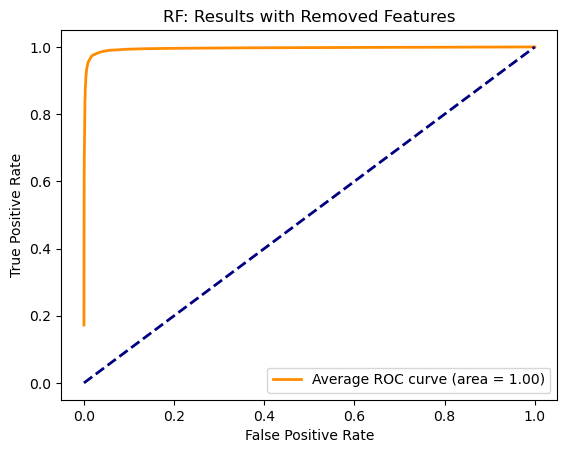

--- RF: Results when Model Handles Missing Values ---
Accuracy: 0.9888155805666302
Precision: 0.9885680657099576
Recall: 0.9888155805666302
F1-Score: 0.9884654609645055
Cross-validation scores: [0.98646026 0.98482844 0.98769516 0.98491664 0.98526882]
Average CV Score: 0.9858

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.85      0.89       459
           1       0.95      0.79      0.86       603
           2       0.99      1.00      0.99     26518
           3       0.98      0.91      0.94       763

    accuracy                           0.99     28343
   macro avg       0.96      0.89      0.92     28343
weighted avg       0.99      0.99      0.99     28343

Confusion Matrix:
 [[  391     1    62     5]
 [    7   477   117     2]
 [   24    24 26464     6]
 [    2     0    67   694]]
ROC-AUC Score: 0.9978
Training Time: 33.05 seconds





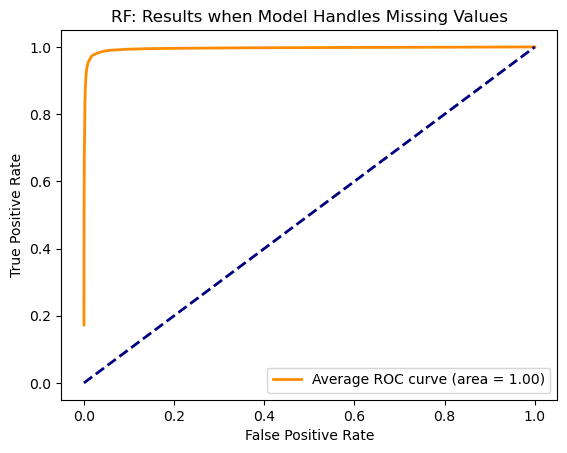

In [3]:
                                                                        # STEP 2 

                                                    ## Handling Missing Values For Random Forest##
                                                    ################################################
                                                    #prerequisites : STEP 1
import time 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Replace '?' with np.nan for easier processing
df.replace('?', pd.NA, inplace=True)

# Drop 'impact' and 'urgency' features 
if 'impact' in df.columns and 'urgency' in df.columns:
    df.drop(['impact', 'urgency'], axis=1, inplace=True)

label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

X = df.drop('priority', axis=1)
y = df['priority']

df_imp = df.copy()

# Convert boolean columns to integer type
bool_columns = df_imp.select_dtypes(include=['bool']).columns
df_imp[bool_columns] = df_imp[bool_columns].astype(int)

# Encode object columns to numeric using label encoding
label_encoder = LabelEncoder()
for col in df_imp.select_dtypes(include=['object']).columns:
    df_imp[col] = label_encoder.fit_transform(df_imp[col].astype(str))

X_imp = df_imp.drop('priority', axis=1)
y_imp = df_imp['priority']

# Scenario 1: Imputation
X_train_imputed, X_test_imputed, y_train_imputed, y_test_imputed = train_test_split(X_imp, y_imp, test_size=0.2, random_state=42)

# Apply Simple imputer for all features
simple_imputer = SimpleImputer(strategy='most_frequent')
X_train_imputed = pd.DataFrame(simple_imputer.fit_transform(X_train_imputed), columns=X_train_imputed.columns)
X_test_imputed = pd.DataFrame(simple_imputer.transform(X_test_imputed), columns=X_test_imputed.columns)

# Scenario 2: Removal
X_removal = X.drop(columns=high_missing_features)
y_removal=y
X_train_removal, X_test_removal, y_train_removal, y_test_removal = train_test_split(X_removal, y_removal, test_size=0.2, random_state=42)

# Scenario 3: Model handles missing values
X_train_model_hanldes, X_test__model_hanldes, y_train_model_hanldesl, y_test_model_hanldes = train_test_split(X, y, test_size=0.2, random_state=42)

def train_evaluate(X_train,X_test, y_train,  y_test, smote_apply=True):
    # Apply SMOTE if required
    if smote_apply:
        smote = SMOTE()
        X_train, y_train = smote.fit_resample(X_train, y_train)

    # Train the model
    model = RandomForestClassifier(random_state=42)
    start_time = time.time()  # Start time
    model.fit(X_train, y_train)
    end_time = time.time()  # End time
    training_time = end_time - start_time  # Calculate training time

    # Predictions and evaluation on the test set
    predictions = model.predict(X_test)
    pred_proba = model.predict_proba(X_test)
    accuracy_val = accuracy_score(y_test, predictions)
    precision_val = precision_score(y_test, predictions, average='weighted')
    recall_val = recall_score(y_test, predictions, average='weighted')
    f1_val = f1_score(y_test, predictions, average='weighted')
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)

    # ROC AUC score
    pred_proba = model.predict_proba(X_test)
    roc_auc = roc_auc_score(y_test, pred_proba, multi_class='ovr', average='weighted')

    # Classification report and confusion matrix for test data
    class_report = classification_report(y_test, predictions)
    conf_matrix = confusion_matrix(y_test, predictions)

    return accuracy_val, precision_val, recall_val, f1_val, cv_scores, class_report, conf_matrix,roc_auc,training_time, y_test,pred_proba 

# Define the model
model = RandomForestClassifier(random_state=42, min_samples_split=10, min_samples_leaf=4)

# Evaluate each scenario
results_imputed = train_evaluate(X_train_imputed, X_test_imputed, y_train_imputed, y_test_imputed)
print_results("RF: Results with Imputed Features", results_imputed[:9])
y_test, pred_proba = results_imputed[-2:]
plot_multi_class_roc_curve(y_test, pred_proba, 4, "RF: Results with Imputed Features")

results_removed = train_evaluate(X_train_removal, X_test_removal, y_train_removal, y_test_removal)
print_results("RF: Results with Removed Features", results_removed[:9])
y_test, pred_proba = results_imputed[-2:]
plot_multi_class_roc_curve(y_test, pred_proba, 4, "RF: Results with Removed Features")

results_model_handles = train_evaluate(X_train_model_hanldes, X_test__model_hanldes, y_train_model_hanldesl, y_test_model_hanldes, smote_apply=False)
print_results("RF: Results when Model Handles Missing Values", results_model_handles[:9])
y_tes, pred_proba = results_imputed[-2:]
plot_multi_class_roc_curve(y_test, pred_proba, 4, "RF: Results when Model Handles Missing Values")

In [13]:
                                                                            #STEP 3

                                                        ## Handling of missing values for Gradient Boost Machine
                                                        ######################################################
                                                          #prerequisites : STEP 1                                                    
import time
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Load the dataset
# df = pd.read_csv('incident_event_log.csv')

# Replace '?' with np.nan for easier processing
df.replace('?', np.nan, inplace=True)

# Drop 'impact' and 'urgency' features 
if 'impact' in df.columns and 'urgency' in df.columns:
    df.drop(['impact', 'urgency'], axis=1, inplace=True)

label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

X = df.drop('priority', axis=1)
y = df['priority']

# Scenario 1: Imputation
X_train_imputed, X_test_imputed, y_train_imputed, y_test_imputed = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Simple imputer for all features
simple_imputer = SimpleImputer(strategy='most_frequent')
X_train_imputed = pd.DataFrame(simple_imputer.fit_transform(X_train_imputed), columns=X_train_imputed.columns)
X_test_imputed = pd.DataFrame(simple_imputer.transform(X_test_imputed), columns=X_test_imputed.columns)


# Scenario 2: Missingness Indicator
X_missing_indicator = X.copy()
# Add a missing indicator to features that have missing values
for column in X_missing_indicator.columns:
    if X_missing_indicator[column].isna().any():
        X_missing_indicator[column + '_missing'] = X_missing_indicator[column].isna().astype(int)
# Apply mean imputation only to numerical columns
numerical_columns = X_missing_indicator.select_dtypes(include=np.number).columns
X_missing_indicator[numerical_columns] = X_missing_indicator[numerical_columns].fillna(X_missing_indicator[numerical_columns].mean())
# For categorical columns, apply 'most_frequent' imputation strategy
categorical_columns = X_missing_indicator.select_dtypes(include='object').columns
for col in categorical_columns:
    X_missing_indicator[col] = X_missing_indicator[col].fillna(X_missing_indicator[col].mode()[0])

# Split the dataset with missing indicators into training and test sets
X_train_missing_indicator, X_test_missing_indicator, y_train_missing_indicator, y_test_missing_indicator = train_test_split(X_missing_indicator, y, test_size=0.2, random_state=42)

# Scenario 3: Model handles missing values
X_model_handles = X.copy()
X_train_model_handles, X_test_model_handles, y_train_model_handles, y_test_model_handles = train_test_split(X_model_handles, y, test_size=0.2, random_state=42)

def train_evaluate_gbm(X_train, X_test, y_train, y_test, smote_apply=True):
    if smote_apply:
        smote = SMOTE()
        X_train, y_train = smote.fit_resample(X_train, y_train)

    gb_model = GradientBoostingClassifier(random_state=42)
    start_time = time.time()
    gb_model.fit(X_train, y_train)
    training_time = time.time() - start_time

    predictions_test = gb_model.predict(X_test)

    accuracy_test = accuracy_score(y_test, predictions_test)
    precision_test = precision_score(y_test, predictions_test, average='weighted')
    recall_test = recall_score(y_test, predictions_test, average='weighted')
    f1_test = f1_score(y_test, predictions_test, average='weighted')
    cv_scores = cross_val_score(gb_model, X_train, y_train, cv=5)

    pred_proba_test = gb_model.predict_proba(X_test)
    roc_auc_test = roc_auc_score(y_test, pred_proba_test, multi_class='ovr', average='weighted')

    class_report_test = classification_report(y_test, predictions_test)
    conf_matrix_test = confusion_matrix(y_test, predictions_test)

    return accuracy_test, precision_test, recall_test, f1_test, cv_scores, class_report_test, conf_matrix_test, roc_auc_test, training_time, y_test, pred_proba_test

# Evaluate scenarios : in the three following blocks


--- GBM: Results with Imputed Features ---
Accuracy: 0.8051723529619307
Precision: 0.935949232665559
Recall: 0.8051723529619307
F1-Score: 0.8544576763803081
Cross-validation scores: [0.84325294 0.85505092 0.85243135 0.85318654 0.85652589]
Average CV Score: 0.8521

Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.75      0.55       459
           1       0.11      0.57      0.18       603
           2       0.98      0.81      0.89     26518
           3       0.25      0.84      0.39       763

    accuracy                           0.81     28343
   macro avg       0.44      0.74      0.50     28343
weighted avg       0.94      0.81      0.85     28343

Confusion Matrix:
 [[  345    33    58    23]
 [   21   346   221    15]
 [  425  2760 21486  1847]
 [    8    20    91   644]]
ROC-AUC Score: 0.8813
Training Time: 780.43 seconds





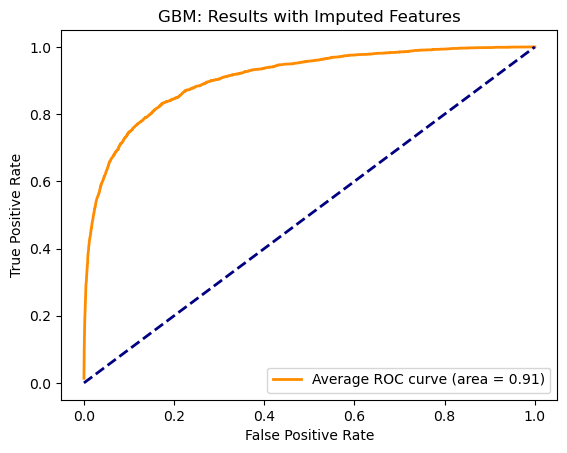

In [5]:
#step 3 
results_imputed = train_evaluate_gbm(X_train_imputed, X_test_imputed, y_train_imputed, y_test_imputed)
print_results("GBM: Results with Imputed Features", results_imputed[:9])
y_test, pred_proba = results_imputed[-2:]
plot_multi_class_roc_curve(y_test, pred_proba, 4, "GBM: Results with Imputed Features")

--- GBM: Results with Missing Indicator Features ---
Accuracy: 0.8077479448188265
Precision: 0.936403415384458
Recall: 0.8077479448188265
F1-Score: 0.8560714297015682
Cross-validation scores: [0.84050361 0.85716309 0.85510992 0.85080298 0.85024839]
Average CV Score: 0.8508

Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.76      0.55       459
           1       0.12      0.59      0.19       603
           2       0.98      0.81      0.89     26518
           3       0.25      0.84      0.39       763

    accuracy                           0.81     28343
   macro avg       0.45      0.75      0.51     28343
weighted avg       0.94      0.81      0.86     28343

Confusion Matrix:
 [[  351    36    53    19]
 [   20   358   214    11]
 [  436  2689 21545  1848]
 [    5    22    96   640]]
ROC-AUC Score: 0.8814
Training Time: 859.36 seconds





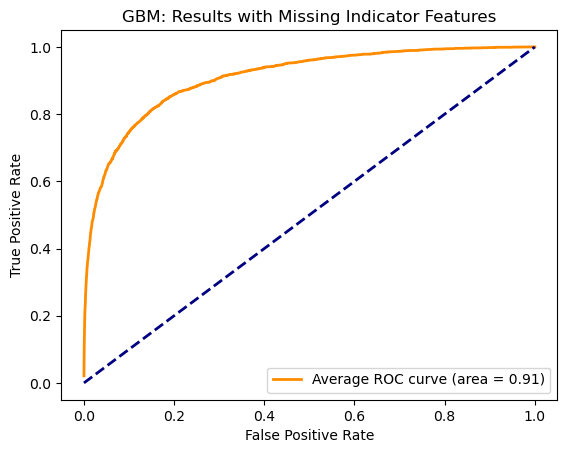

In [10]:
#step 3
results_missing_indicator = train_evaluate_gbm(X_train_missing_indicator, X_test_missing_indicator, y_train_missing_indicator, y_test_missing_indicator)
print_results("GBM: Results with Missing Indicator Features", results_missing_indicator[:9])
y_test, pred_proba = results_missing_indicator[-2:]
plot_multi_class_roc_curve(y_test, pred_proba, 4, "GBM: Results with Missing Indicator Features")

--- GBM: Results when GBM Model Handles Missing Values ---
Accuracy: 0.9542038598595773
Precision: 0.9495802270619271
Recall: 0.9542038598595773
F1-Score: 0.9435977774249004
Cross-validation scores: [0.95329452 0.95254476 0.95272118 0.95329452 0.95346888]
Average CV Score: 0.9531

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.59      0.70       459
           1       0.82      0.18      0.29       603
           2       0.96      1.00      0.98     26518
           3       0.84      0.32      0.47       763

    accuracy                           0.95     28343
   macro avg       0.87      0.52      0.61     28343
weighted avg       0.95      0.95      0.94     28343

Confusion Matrix:
 [[  270     2   185     2]
 [    8   108   487     0]
 [   31    21 26420    46]
 [    0     0   516   247]]
ROC-AUC Score: 0.9251
Training Time: 179.40 seconds





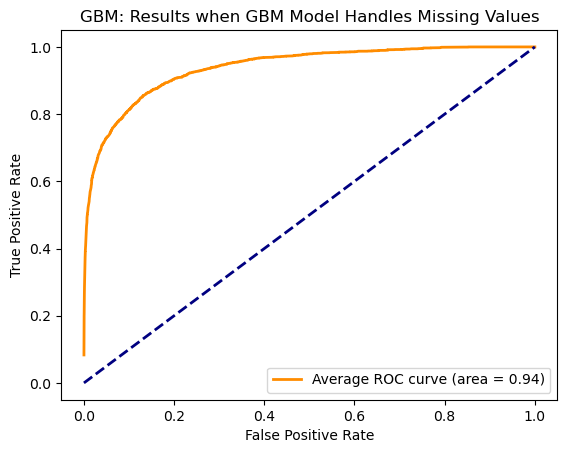

In [14]:
#step 3
results_model_handles = train_evaluate_gbm(X_train_model_handles, X_test_model_handles, y_train_model_handles, y_test_model_handles, smote_apply=False)
print_results("GBM: Results when GBM Model Handles Missing Values", results_model_handles[:9])
y_test, pred_proba = results_model_handles[-2:]
plot_multi_class_roc_curve(y_test, pred_proba, 4, "GBM: Results when GBM Model Handles Missing Values")

Features before selection: Index(['number', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'made_sla', 'caller_id', 'opened_by',
       'opened_at', 'sys_created_by', 'sys_created_at', 'sys_updated_by',
       'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory',
       'u_symptom', 'priority', 'assignment_group', 'assigned_to', 'knowledge',
       'u_priority_confirmation', 'notify', 'closed_code', 'resolved_by',
       'resolved_at', 'closed_at'],
      dtype='object')

Features selected by RFE: Index(['number', 'caller_id', 'opened_by', 'opened_at', 'sys_created_by',
       'sys_created_at', 'subcategory', 'resolved_by', 'resolved_at',
       'closed_at'],
      dtype='object')

Features selected by Correlations Index(['opened_by', 'made_sla', 'number', 'knowledge',
       'u_priority_confirmation', 'u_symptom', 'assigned_to', 'subcategory',
       'opened_at', 'active'],
      dtype='object')

Features selected by RF Fea

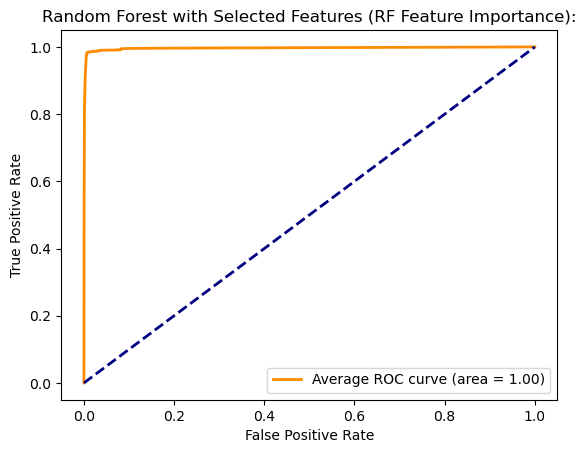

--- Random Forest with Selected Features (RF Feature Importance, REF, Correlations): ---
Accuracy: 0.9847934234202449
Precision: 0.9846714251431987
Recall: 0.9847934234202449
F1-Score: 0.9846871730809815
Cross-validation scores: [0.98936848 0.99352189 0.99374609 0.99360449 0.99382869]
Average CV Score: 0.9928

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85       459
           1       0.90      0.81      0.85       603
           2       0.99      0.99      0.99     26518
           3       0.88      0.90      0.89       763

    accuracy                           0.98     28343
   macro avg       0.90      0.89      0.90     28343
weighted avg       0.98      0.98      0.98     28343

Confusion Matrix:
 [[  393     5    50    11]
 [   16   490    89     8]
 [   50    50 26346    72]
 [    5     2    73   683]]
ROC-AUC Score: 0.9952
Training Time: 127.80 seconds





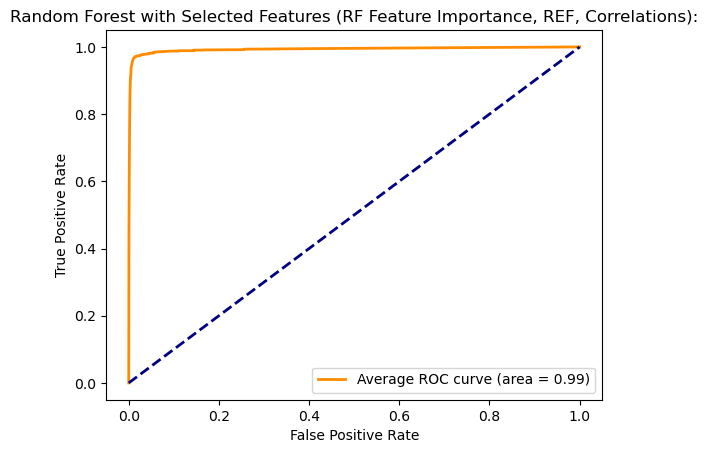

In [15]:
                                                                ## STEP 4

                                                    ## Feature Selection For Random Forest
                                                    ######################################
                                                    #prerequisites : STEP 1
import time 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE


# Create a copy of the DataFrame for processing
df_rf_misval = df.copy()

# Removing features with high missing values
df_rf_misval.drop(columns=high_missing_features, inplace=True)

# Drop 'impact' and 'urgency' features 
if 'impact' in df_rf_misval.columns and 'urgency' in df_rf_misval.columns:
    df_rf_misval.drop(['impact', 'urgency'], axis=1, inplace=True)

# Encoding categorical variables
label_encoder = LabelEncoder()
for col in df_rf_misval.select_dtypes(include=['object']).columns:
    df_rf_misval[col] = label_encoder.fit_transform(df_rf_misval[col].astype(str))

# Define X and y from the processed DataFrame
X = df_rf_misval.drop('priority', axis=1)
y = df_rf_misval['priority']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Random Forest model for feature importance
rf = RandomForestClassifier(random_state=42, min_samples_split=10, min_samples_leaf=4)
rf.fit(X_train, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
top_features_from_importance = feature_importances.nlargest(10).index

# Recursive Feature Elimination
rfe = RFE(estimator=rf, n_features_to_select=10)  # 
rfe.fit(X_train, y_train)
selected_features_rfe = X_train.columns[rfe.support_]

# Correlation Analysis
correlations = X_train.corrwith(y_train).abs().sort_values(ascending=False)
top_features_from_correlation = correlations.head(10).index

selected_features = set(selected_features_rfe) | set(top_features_from_correlation) | set(top_features_from_importance)

print(f"Features before selection: {df_rf_misval.columns}\n")
print(f"Features selected by RFE: {selected_features_rfe}\n")
print(f"Features selected by Correlations {correlations.head(10).index}\n")
print(f"Features selected by RF Features Importance: {top_features_from_importance}\n")
print(f"Combined Selected Features (RF Feature Importance, REF, Correlations): {selected_features}\n")

def train_and_evaluate_model(X_train, y_train, X_test, y_test, features_list, model, apply_smote=True):
    # Convert features_list to list for indexing
    selected_features_list = list(features_list)

    # Apply SMOTE if enabled
    if apply_smote:
        smote = SMOTE()
        X_train, y_train = smote.fit_resample(X_train[selected_features_list], y_train)

    # Training model with selected features
    selected_model = model(random_state=42)

    start_time = time.time()  # Start time
    selected_model.fit(X_train, y_train)
    training_time = time.time() - start_time  # Calculate training time

    # Cross-validation to evaluate the model
    cv_scores = cross_val_score(selected_model, X_train, y_train, cv=5)

    # Evaluate on test data
    predictions_test = selected_model.predict(X_test[selected_features_list])
    accuracy_test = accuracy_score(y_test, predictions_test)
    precision_test = precision_score(y_test, predictions_test, average='weighted')
    recall_test = recall_score(y_test, predictions_test, average='weighted')
    f1_test = f1_score(y_test, predictions_test, average='weighted')

    # Get classification report and confusion matrix for test data
    class_report_test = classification_report(y_test, predictions_test)
    conf_matrix_test = confusion_matrix(y_test, predictions_test)

    # Evaluate on test data for ROC AUC
    pred_proba_test = selected_model.predict_proba(X_test[selected_features_list])
    roc_auc_test = roc_auc_score(y_test, pred_proba_test, multi_class='ovr', average='weighted')

    return accuracy_test, precision_test, recall_test, f1_test, cv_scores, class_report_test, conf_matrix_test, roc_auc_test, training_time, y_test, pred_proba_test


# Train and evaluate model with RF Feature Importance
model_results = train_and_evaluate_model(X_train, y_train, X_test, y_test, top_features_from_importance, RandomForestClassifier)
print_results("Random Forest with Selected Features (RF Feature Importance):", model_results[:9])
y_test, pred_proba = model_results[-2:]
plot_multi_class_roc_curve(y_test, pred_proba, 4, "Random Forest with Selected Features (RF Feature Importance):")

# Train and evaluate model with combined selected features (RF Feature Importance, REF, Correlations)
combined_resuls = train_and_evaluate_model(X_train, y_train, X_test, y_test, selected_features, RandomForestClassifier)
print_results("Random Forest with Selected Features (RF Feature Importance, REF, Correlations):", combined_resuls[:9])
y_test, pred_proba = combined_resuls[-2:]
plot_multi_class_roc_curve(y_test, pred_proba, 4, "Random Forest with Selected Features (RF Feature Importance, REF, Correlations):")


In [16]:
          
                                                                    ## STEP 5

                                                    ## Feature Selection For Gradient Boost Machine
                                                    ################################################
                                                    #prerequisites : STEP 1

import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Create a copy of the DataFrame for processing
df_gbm = df.copy()

# Drop 'impact' and 'urgency' features 
if 'impact' in df_gbm.columns and 'urgency' in df_gbm.columns:
    df_gbm.drop(['impact', 'urgency'], axis=1, inplace=True)

# Encoding categorical variables
label_encoder = LabelEncoder()
for col in df_gbm.select_dtypes(include=['object']).columns:
    df_gbm[col] = label_encoder.fit_transform(df_gbm[col].astype(str))

# Define X and y from the processed DataFrame
X = df_gbm.drop('priority', axis=1)
y = df_gbm['priority']


# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Training the GBM model for feature importance
gbm = GradientBoostingClassifier(random_state=42)
gbm.fit(X_train, y_train)
feature_importances = pd.Series(gbm.feature_importances_, index=X_train.columns)


# Top features based on importance
top_features_from_importance = feature_importances.nlargest(10).index

if not 'top_features_from_rfe' in locals() or selected_features_rfe.empty:
    rf = RandomForestClassifier()  # You might need to adjust this based on your problem
    rfe = RFE(estimator=rf, n_features_to_select=10)
    rfe.fit(X_train, y_train)
    selected_features_rfe = X_train.columns[rfe.support_]

# Check if top_features_from_correlation is empty
if not 'top_features_from_correlation' in locals() or top_features_from_correlation.empty:
    correlations = X_train.corrwith(y_train).abs().sort_values(ascending=False)
    top_features_from_correlation = correlations.head(10).index

combined_features = set(selected_features_rfe) | set(top_features_from_correlation) | set(top_features_from_importance)

print(f"Features before selection: {df_gbm.columns}\n")
print(f"Features selected by RFE: {selected_features_rfe}\n")
print(f"Features selected by Correlations {top_features_from_correlation}\n")
print(f"Features selected by GBM Features Importance: {top_features_from_importance}\n")
print(f"Features selected by GBM Features Importance, REF, Correlations: {combined_features}\n")




Features before selection: Index(['number', 'incident_state', 'active', 'reassignment_count',
       'reopen_count', 'sys_mod_count', 'made_sla', 'caller_id', 'opened_by',
       'opened_at', 'sys_created_by', 'sys_created_at', 'sys_updated_by',
       'sys_updated_at', 'contact_type', 'location', 'category', 'subcategory',
       'u_symptom', 'cmdb_ci', 'priority', 'assignment_group', 'assigned_to',
       'knowledge', 'u_priority_confirmation', 'notify', 'problem_id', 'rfc',
       'vendor', 'caused_by', 'closed_code', 'resolved_by', 'resolved_at',
       'closed_at'],
      dtype='object')

Features selected by RFE: Index(['number', 'caller_id', 'opened_by', 'opened_at', 'sys_created_at',
       'sys_updated_at', 'problem_id', 'resolved_by', 'resolved_at',
       'closed_at'],
      dtype='object')

Features selected by Correlations Index(['opened_by', 'made_sla', 'number', 'knowledge',
       'u_priority_confirmation', 'u_symptom', 'assigned_to', 'subcategory',
       'opened_at', 

--- GBM with Features selected by GBM Features Importance, REF, Correlations ---
Accuracy: 0.9542744240200403
Precision: 0.9492485456881512
Recall: 0.9542744240200403
F1-Score: 0.9445005590764345
Cross-validation scores: [0.95404428 0.95347094 0.95325042 0.95272118 0.95417457]
Average CV Score: 0.9535

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.58      0.69       459
           1       0.80      0.20      0.33       603
           2       0.96      1.00      0.98     26518
           3       0.83      0.34      0.49       763

    accuracy                           0.95     28343
   macro avg       0.86      0.53      0.62     28343
weighted avg       0.95      0.95      0.94     28343

Confusion Matrix:
 [[  264     1   194     0]
 [    9   123   471     0]
 [   38    29 26397    54]
 [    0     0   500   263]]
ROC-AUC Score: 0.9265
Training Time: 144.60 seconds





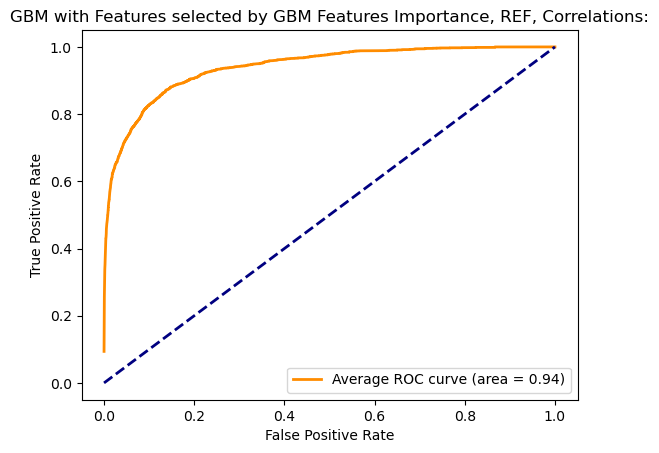

In [7]:
#step 5

import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Create a copy of the DataFrame for processing
df_gbm = df.copy()

# Drop 'impact' and 'urgency' features 
if 'impact' in df_gbm.columns and 'urgency' in df_gbm.columns:
    df_gbm.drop(['impact', 'urgency'], axis=1, inplace=True)

# Encoding categorical variables
label_encoder = LabelEncoder()
for col in df_gbm.select_dtypes(include=['object']).columns:
    df_gbm[col] = label_encoder.fit_transform(df_gbm[col].astype(str))

# Define X and y from the processed DataFrame
X = df_gbm.drop('priority', axis=1)
y = df_gbm['priority']


# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


def train_and_evaluate_model(X_train, X_test, y_train, y_test, features_list, apply_smote=True):
    # Convert features_list to list for indexing
    selected_features_list = list(features_list)

    # Ensure the order and set of features are the same for training and testing
    X_train_selected = X_train[selected_features_list].copy()
    X_test_selected = X_test[selected_features_list].copy()

    # Apply SMOTE for consistency
    if apply_smote:
        smote = SMOTE()
        X_train_selected, y_train = smote.fit_resample(X_train_selected, y_train)

    # Training model with selected features
    selected_model = GradientBoostingClassifier(random_state=42)

    start_time = time.time()  # Start time
    selected_model.fit(X_train_selected, y_train)
    training_time = time.time() - start_time  # Calculate training time

    # Cross-validation to evaluate the model
    cv_scores = cross_val_score(selected_model, X_train_selected, y_train, cv=5)

    # Evaluate on test data
    predictions_test = selected_model.predict(X_test_selected)
    accuracy_test = accuracy_score(y_test, predictions_test)
    precision_test = precision_score(y_test, predictions_test, average='weighted')
    recall_test = recall_score(y_test, predictions_test, average='weighted')
    f1_test = f1_score(y_test, predictions_test, average='weighted')

    # Get classification report and confusion matrix for test data
    class_report_test = classification_report(y_test, predictions_test)
    conf_matrix_test = confusion_matrix(y_test, predictions_test)

    # Evaluate on test data for ROC AUC
    pred_proba_test = selected_model.predict_proba(X_test_selected)
    roc_auc_test = roc_auc_score(y_test, pred_proba_test, multi_class='ovr', average='weighted')

    return accuracy_test, precision_test, recall_test, f1_test, cv_scores, class_report_test, conf_matrix_test, roc_auc_test, training_time, y_test, pred_proba_test


top_combined_features=['active', 'subcategory', 'u_symptom', 'resolved_by', 'problem_id', 'assigned_to', 'number', 'opened_by', 'opened_at', 
 'caller_id', 'sys_created_at', 'made_sla', 'sys_updated_at', 'resolved_at', 'assignment_group', 
 'u_priority_confirmation', 'category', 'knowledge', 'closed_at']


# Train and evaluate model with GBM Feature Importance
model_results = train_and_evaluate_model(X_train, X_test, y_train, y_test, top_combined_features, apply_smote=False)
print_results("GBM with Features selected by GBM Features Importance, REF, Correlations", model_results[:9])
y_test, pred_proba = model_results[-2:]
plot_multi_class_roc_curve(y_test, pred_proba, 4, "GBM with Features selected by GBM Features Importance, REF, Correlations:")



--- GBM with Selected Features (GBM Feature Importance) ---
Accuracy: 0.9533570899340225
Precision: 0.9483627423109613
Recall: 0.9533570899340225
F1-Score: 0.9436549922624021
Cross-validation scores: [0.95325042 0.95201552 0.95192732 0.95130987 0.95126362]
Average CV Score: 0.9520

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.57      0.65       459
           1       0.81      0.20      0.32       603
           2       0.96      0.99      0.98     26518
           3       0.84      0.36      0.50       763

    accuracy                           0.95     28343
   macro avg       0.84      0.53      0.61     28343
weighted avg       0.95      0.95      0.94     28343

Confusion Matrix:
 [[  260     1   198     0]
 [   14   118   471     0]
 [   68    26 26372    52]
 [    2     0   490   271]]
ROC-AUC Score: 0.9231
Training Time: 83.19 seconds





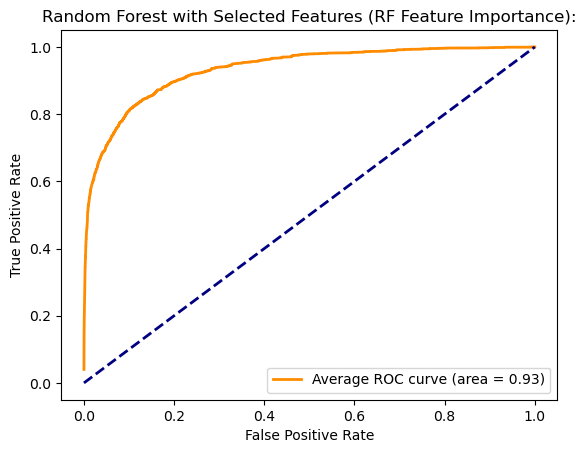

In [9]:
#step 5: 
# Train and evaluate model with GBM Feature Importance
top_model_selected_features = ['opened_by', 'number', 'problem_id', 'resolved_by', 'closed_at',
       'opened_at', 'caller_id', 'assignment_group', 'subcategory',
       'category']

model_results = train_and_evaluate_model(X_train, X_test, y_train, y_test, top_model_selected_features, apply_smote=False)
print_results("GBM with Selected Features (GBM Feature Importance)", model_results[:9])
y_test, pred_proba = model_results[-2:]
plot_multi_class_roc_curve(y_test, pred_proba, 4, "Random Forest with Selected Features (RF Feature Importance):")

In [12]:
                                                            ##STEP 6

                                         # EDA : Exploratory Data Analysisv for the Selected Features
                                         ############################################################
                                         ##Prerequisites : STEP 1 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import chi2_contingency

warnings.filterwarnings('ignore', category=FutureWarning)

# Replace '?' with NaN (null)
df.replace('?', pd.NA, inplace=True)

# Selected features for Random Forest
selected_features = ['knowledge', 'opened_by', 'caller_id', 'number', 'active',
                     'sys_created_by', 'assigned_to', 'resolved_by', 'made_sla',
                     'sys_created_at', 'subcategory', 'u_priority_confirmation',
                     'closed_at', 'u_symptom', 'resolved_at', 'opened_at']

# Filter the dataset for selected features and target
df_selected = df[selected_features + ['priority']]

# Identify categorical and numerical features
categorical_features = df_selected.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()
numerical_features = [feature for feature in selected_features if feature not in categorical_features]

# Basic Data Overview
print("Data Info:\n")
print(df_selected.info())
print("\nBasic Statistical Overview:\n")
print(df_selected.describe())
print("\n")

top_n = 30  # Number of categories to consider for each feature

# Function to get top_n categories of a feature
def get_top_categories(series, n=top_n):
    return series.value_counts().index[:n]

# Distribution Analysis, Value Counts, Cross-tabulation, and Association Analysis
for feature in categorical_features:
    top_categories = get_top_categories(df_selected[feature])
    df_top_categories = df_selected[df_selected[feature].isin(top_categories)]

    '''
    # Plotting the distribution
    plt.figure(figsize=(40, 8))
    sns.countplot(y=feature, data=df_top_categories, order=top_categories)
    plt.title(f'Top {top_n} {feature} Distribution')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    '''

    # Calculate value counts for the top categories
    top_categories = df_selected[feature].value_counts().head(top_n)
    # Calculate percentages
    percentages = top_categories / len(df_selected) * 100
    # Display the top categories with frequencies and percentages
    print(f"Top {top_n} categories in {feature}:\n")
    print(pd.DataFrame({'Frequency': top_categories, 'Percentage': percentages.round(2)}))
    print("\n")
    # Calculate total frequency and percentage for the top n categories
    total_frequency = top_categories.sum()
    total_percentage = total_frequency / len(df_selected) * 100
    print(f"Total Frequency of Top {top_n} categories in {feature}: {total_frequency}")
    print(f"Total Percentage of Top {top_n} categories in {feature}: {total_percentage:.2f}%")
    print("\n")

    '''
    # Target Distribution within Categories
    plt.figure(figsize=(40, 8))
    sns.countplot(y=feature, hue="priority", data=df_top_categories, order=top_categories)
    plt.title(f'Target Distribution within Top {top_n} {feature}')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    '''
# Association Analysis (Chi-Squared Test) for each pair of categorical features
for i, feature1 in enumerate(categorical_features):
    for feature2 in categorical_features[i+1:]:
        top_categories_feature1 = get_top_categories(df_selected[feature1])
        top_categories_feature2 = get_top_categories(df_selected[feature2])

        filtered_data = df_selected[(df_selected[feature1].isin(top_categories_feature1)) & 
                                    (df_selected[feature2].isin(top_categories_feature2))]

        cross_tab = pd.crosstab(index=filtered_data[feature1], columns=filtered_data[feature2])
        chi2, p, dof, ex = chi2_contingency(cross_tab)
        
        print(f"Cross-tabulation between {feature1} and {feature2}:")
        if (feature1 == "pririty") | (feature2 == "priority"):
            print(cross_tab)
        print(f"\nChi-Squared Test result for {feature1} and {feature2}: Chi2 = {chi2}, p-value = {p}\n")

Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141712 entries, 0 to 141711
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   knowledge                141712 non-null  bool  
 1   opened_by                136877 non-null  object
 2   caller_id                141683 non-null  object
 3   number                   141712 non-null  object
 4   active                   141712 non-null  bool  
 5   sys_created_by           88636 non-null   object
 6   assigned_to              114216 non-null  object
 7   resolved_by              141486 non-null  object
 8   made_sla                 141712 non-null  bool  
 9   sys_created_at           88636 non-null   object
 10  subcategory              141601 non-null  object
 11  u_priority_confirmation  141712 non-null  bool  
 12  closed_at                141712 non-null  object
 13  u_symptom                108748 non-null  object
 14  resolved

In [9]:
                                                                ## step 7 

                                                ## Functions needed for Feature Enginnering 
                                                ########################################### 
                                                

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Function to process datetime features
def process_datetime_features(df):
    for feature in ['sys_created_at', 'closed_at', 'resolved_at', 'opened_at']:
        df[feature] = pd.to_datetime(df[feature], dayfirst=True)
        df[feature + '_year'] = df[feature].dt.year
        df[feature + '_month'] = df[feature].dt.month
        df[feature + '_day'] = df[feature].dt.day
        df[feature + '_hour'] = df[feature].dt.hour
        df.drop(feature, axis=1, inplace=True)
    return df

def process_rare_categories(df, threshold=0.01):
    categorical_features = df.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()
    for feature in categorical_features:
        
        # Check if feature is not a datetime feature
        if feature not in ['sys_created_at', 'closed_at', 'resolved_at', 'opened_at']:
            # Process rare categories
            frequency = df[feature].value_counts(normalize=True)
            rare_categories = frequency[frequency < threshold].index
            df[feature] = df[feature].replace(rare_categories, 'Other')

        # Encode all categorical features
        df[feature] = LabelEncoder().fit_transform(df[feature].astype(str))
    return df


def prepare_data(df, target):
    # Handling missing values for datetime related columns
    for feature in ['sys_created_at', 'resolved_at']:
        if df[feature + '_year'].isnull().sum() > 0:
            for col in [feature + '_year', feature + '_month', feature + '_day', feature + '_hour']:
                df[col].fillna(df[col].median(), inplace=True)

    # Handling missing values for other categorical features
    categorical_features = df.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()
    for feature in categorical_features:
        if df[feature].isnull().sum() > 0:
            df[feature] = df[feature].fillna('Missing')  # Replace NaN with 'Missing'

    # Encoding the target variable if it's categorical
    if df[target].dtype == 'object':
        df[target] = LabelEncoder().fit_transform(df[target])

    # Encode non-numeric columns for the entire dataset
    non_numeric_columns = df.select_dtypes(include=['object']).columns
    for col in non_numeric_columns:
        df[col] = LabelEncoder().fit_transform(df[col])

    return df


--- Random Forest - Scenario 1: Only Date-Time Feature Conversion ---
Accuracy: 0.9734669395243808
Precision: 0.9718003108145843
Recall: 0.9734669395243808
F1-Score: 0.9706707910849799
Cross-validation scores: [0.96895213 0.96877573 0.96865628 0.96818583 0.96918553]
Average CV Score: 0.9688

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.48      0.61       467
           1       0.90      0.57      0.70       582
           2       0.98      1.00      0.99     26500
           3       0.95      0.77      0.85       793

    accuracy                           0.97     28342
   macro avg       0.92      0.70      0.79     28342
weighted avg       0.97      0.97      0.97     28342

Confusion Matrix:
 [[  223     3   234     7]
 [   11   331   239     1]
 [   23    30 26425    22]
 [   10     2   170   611]]
ROC-AUC Score: 0.9959
Training Time: 18.14 seconds





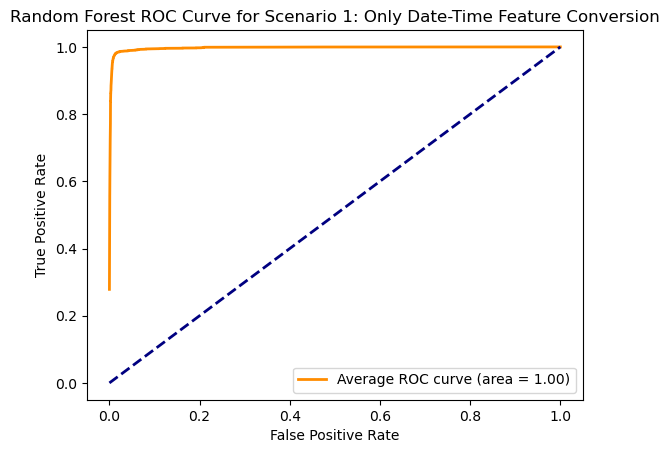

--- Random Forest - Scenario 2: Date-Time Feature Conversion and Rare Category Handling ---
Accuracy: 0.9683508573848
Precision: 0.9662942209480899
Recall: 0.9683508573848
F1-Score: 0.9639477044678628
Cross-validation scores: [0.96142538 0.96454193 0.9613055  0.96154072 0.96242282]
Average CV Score: 0.9622

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.37      0.51       467
           1       0.89      0.50      0.64       582
           2       0.97      1.00      0.98     26500
           3       0.94      0.70      0.81       793

    accuracy                           0.97     28342
   macro avg       0.91      0.64      0.74     28342
weighted avg       0.97      0.97      0.96     28342

Confusion Matrix:
 [[  172     3   284     8]
 [    5   289   287     1]
 [   18    31 26427    24]
 [    8     1   227   557]]
ROC-AUC Score: 0.9935
Training Time: 10.38 seconds





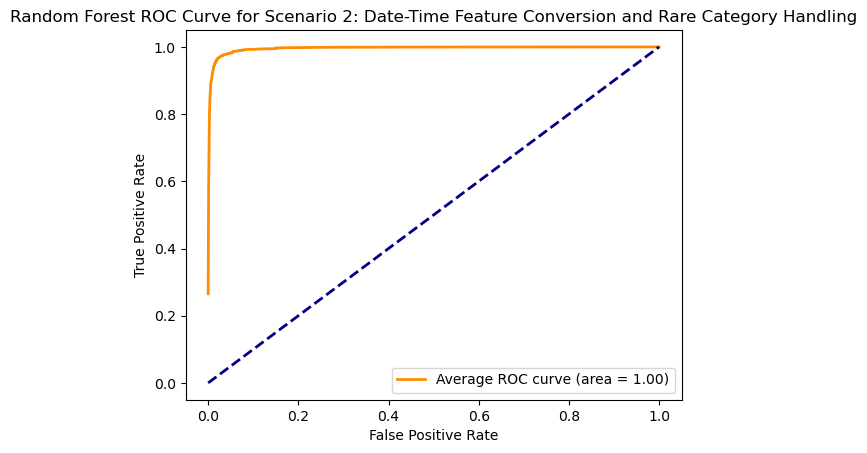

In [15]:
                                                               ## STEP 8 

                                                ## Feature Engineering for Random Forest
                                                ########################################
                                                ##Prerequisites : STEP 1 and Step 7
import time 
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
import warnings
from imblearn.over_sampling import SMOTE

warnings.filterwarnings('ignore', category=FutureWarning)

# Replace '?' with NaN (null) in the DataFrame
df.replace('?', pd.NA, inplace=True)

# Define selected features and target
selected_features = ['knowledge', 'opened_by', 'caller_id', 'number', 'active',
                     'sys_created_by', 'assigned_to', 'resolved_by', 'made_sla',
                     'sys_created_at', 'subcategory', 'u_priority_confirmation',
                     'closed_at', 'u_symptom', 'resolved_at', 'opened_at']
target = 'priority'

# Original DataFrame selection...
df_selected = df[selected_features + [target]]


# Scenario 1: Only Date-Time Feature Conversion
df_scenario1_rf = process_datetime_features(df_selected.copy())

# Scenario 2: Date-Time Feature Conversion and Rare Category Handling
df_scenario2_rf = process_datetime_features(df_selected.copy())
df_scenario2_rf = process_rare_categories(df_scenario2_rf)

def train_evaluate_rf_model(df, model, smote_apply=True):
    label_encoder = LabelEncoder()
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = label_encoder.fit_transform(df[col].astype(str))

    X = df.drop('priority', axis=1)
    y = df['priority']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Apply SMOTE only on training data
    if smote_apply:
        smote = SMOTE()
        X_train, y_train = smote.fit_resample(X_train, y_train)

    start_time = time.time()  # Start time
    model.fit(X_train, y_train)
    end_time = time.time()  # End time
    training_time = end_time - start_time  # Calculate training time
    predictions_test = model.predict(X_test)  # Evaluate on test data

    # Calculate metrics on test data
    accuracy_test = accuracy_score(y_test, predictions_test)
    precision_test = precision_score(y_test, predictions_test, average='weighted')
    recall_test = recall_score(y_test, predictions_test, average='weighted')
    f1_test = f1_score(y_test, predictions_test, average='weighted')

    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)

    pred_proba_test = model.predict_proba(X_test)  # Predict class probabilities for ROC AUC
    roc_auc_test = roc_auc_score(y_test, pred_proba_test, multi_class='ovr', average='weighted')

    # Get classification report and confusion matrix for test data
    class_report = classification_report(y_test, predictions_test)
    conf_matrix = confusion_matrix(y_test, predictions_test)

    # Return metrics calculated on test data and other relevant information
    return accuracy_test, precision_test, recall_test, f1_test, cv_scores,class_report,conf_matrix, roc_auc_test, training_time, y_test, pred_proba_test

          
n_classes = df[target].nunique()  

# Scenario 1: Only Date-Time Feature Conversion
rf_scenario1_results = train_evaluate_rf_model(df_scenario1_rf, target, n_classes)

print_results("Random Forest - Scenario 1: Only Date-Time Feature Conversion", rf_scenario1_results[:9])
y_test_binarized_scenario1, rf_pred_proba_scenario1 = rf_scenario1_results[-2:]
plot_multi_class_roc_curve(    y_test_binarized_scenario1, rf_pred_proba_scenario1, n_classes, "Random Forest ROC Curve for Scenario 1: Only Date-Time Feature Conversion")

# Scenario 2: Date-Time Feature Conversion and Rare Category Handling
rf_scenario2_results = train_evaluate_rf_model(df_scenario2_rf, target, n_classes)

print_results("Random Forest - Scenario 2: Date-Time Feature Conversion and Rare Category Handling", rf_scenario2_results[:9] )
y_test_binarized_scenario2, rf_pred_proba_scenario2 = rf_scenario2_results [-2:]
plot_multi_class_roc_curve( y_test_binarized_scenario2, rf_pred_proba_scenario2, n_classes, "Random Forest ROC Curve for Scenario 2: Date-Time Feature Conversion and Rare Category Handling")




--- Gradient Boosting Machine - Scenario 1: Only Date-Time Feature Conversion ---
Accuracy: 0.94873332862889
Precision: 0.9439486144069501
Recall: 0.94873332862889
F1-Score: 0.9354124058119464
Cross-validation scores: [0.94684229 0.9469599  0.94801529 0.94760365 0.94766245]
Average CV Score: 0.9474

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.19      0.31       467
           1       0.88      0.19      0.31       582
           2       0.95      1.00      0.97     26500
           3       0.80      0.35      0.49       793

    accuracy                           0.95     28342
   macro avg       0.87      0.43      0.52     28342
weighted avg       0.94      0.95      0.94     28342

Confusion Matrix:
 [[   90     0   370     7]
 [    2   110   470     0]
 [   14    15 26409    62]
 [    0     0   513   280]]
ROC-AUC Score: 0.9093
Training Time: 82.48 seconds





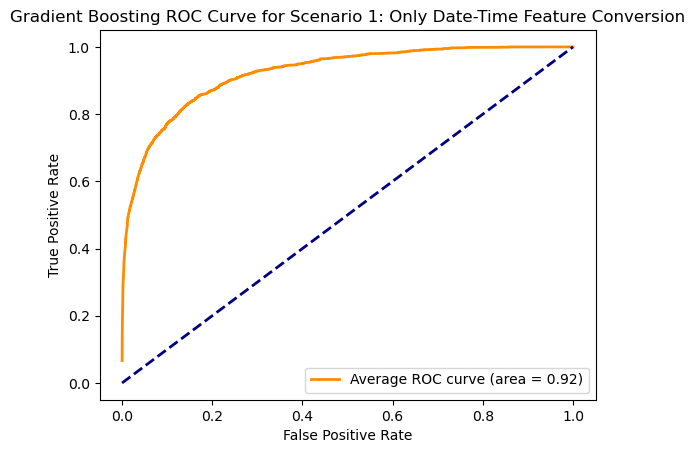

--- Gradient Boosting Machine - Scenario 2: Date-Time Feature Conversion and Rare Category Handling ---
Accuracy: 0.9441817796909181
Precision: 0.9371770647844042
Recall: 0.9441817796909181
F1-Score: 0.926530157916658
Cross-validation scores: [0.94231448 0.94184406 0.94160541 0.94207586 0.94313437]
Average CV Score: 0.9422

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.11      0.19       467
           1       0.82      0.10      0.17       582
           2       0.95      1.00      0.97     26500
           3       0.79      0.29      0.42       793

    accuracy                           0.94     28342
   macro avg       0.84      0.37      0.44     28342
weighted avg       0.94      0.94      0.93     28342

Confusion Matrix:
 [[   51     0   411     5]
 [    5    56   521     0]
 [    7    12 26424    57]
 [    0     0   564   229]]
ROC-AUC Score: 0.8927
Training Time: 67.00 seconds





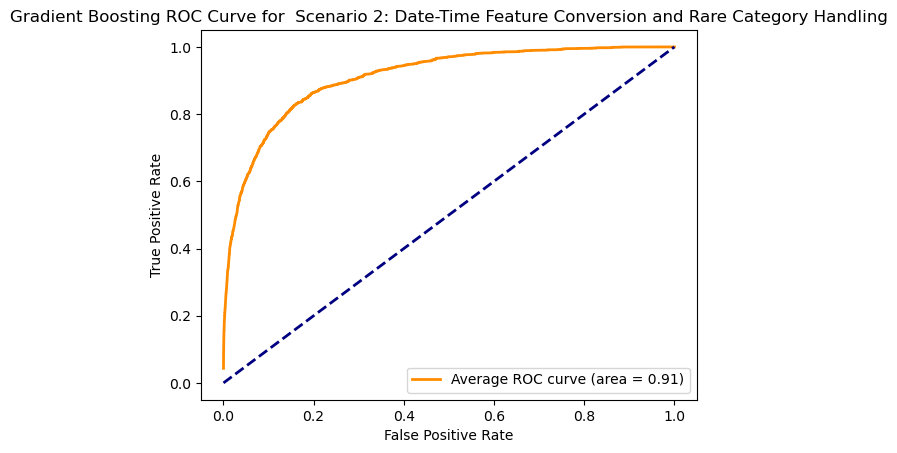

In [14]:
                                                    ##STEP 9

                                ## Feature Engineering for Gradient Boost Machine
                                #################################################
                                ##Prerequisites : STEP 1 and Step 7

import time
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import warnings
from imblearn.over_sampling import SMOTE

warnings.filterwarnings('ignore', category=FutureWarning)

# Replace '?' with NaN (null) in the DataFrame
df.replace('?', pd.NA, inplace=True)

# Define selected features and target
selected_features = ['knowledge', 'opened_by', 'caller_id', 'number', 'active',
                     'sys_created_by', 'assigned_to', 'resolved_by', 'made_sla',
                     'sys_created_at', 'subcategory', 'u_priority_confirmation',
                     'closed_at', 'u_symptom', 'resolved_at', 'opened_at']
target = 'priority'

def train_evaluate_model(df, target, apply_smote=True):
    label_encoder = LabelEncoder()
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = label_encoder.fit_transform(df[col].astype(str))

   
    df = prepare_data(df, target)

    X = df.drop(target, axis=1)
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    if apply_smote:
        smote = SMOTE(random_state=42)
        X_train, y_train = smote.fit_resample(X_train, y_train)

    gbm_model = GradientBoostingClassifier(random_state=42)
    
    start_time = time.time()
    gbm_model.fit(X_train, y_train)
    training_time = time.time() - start_time

    gbm_pred_test = gbm_model.predict(X_test)

    gbm_accuracy_test = accuracy_score(y_test, gbm_pred_test)
    gbm_precision_test = precision_score(y_test, gbm_pred_test, average='weighted')
    gbm_recall_test = recall_score(y_test, gbm_pred_test, average='weighted')
    gbm_f1_test = f1_score(y_test, gbm_pred_test, average='weighted')

    gbm_pred_proba_test = gbm_model.predict_proba(X_test)
    gbm_roc_auc = roc_auc_score(y_test, gbm_pred_proba_test, multi_class='ovr', average='weighted')

    gbm_cv_scores = cross_val_score(gbm_model, X_train, y_train, cv=5)
    # Get classification report and confusion matrix for test data
    gbm_class_report = classification_report(y_test, gbm_pred_test)
    gbm_conf_matrix = confusion_matrix(y_test, gbm_pred_test)

    return gbm_accuracy_test, gbm_precision_test, gbm_recall_test, gbm_f1_test, gbm_cv_scores,gbm_class_report,gbm_conf_matrix, gbm_roc_auc, training_time, y_test, gbm_pred_proba_test
    
# Original DataFrame selection.
df_selected = df[selected_features + [target]]

# Scenario 1: Only Date-Time Feature Conversion
df_scenario1 = process_datetime_features(df_selected.copy())

# Scenario 2: Date-Time Feature Conversion and Rare Category Handling
df_scenario2 = process_datetime_features(df_selected.copy())
df_scenario2 = process_rare_categories(df_scenario2)

# Scenario 1
scenario1_results = train_evaluate_model(df_scenario1, target)
print_results("Gradient Boosting Machine - Scenario 1: Only Date-Time Feature Conversion", scenario1_results[:9])
y_test_scenario1, gbm_pred_proba_scenario1 =scenario1_results[-2:]
plot_multi_class_roc_curve(y_test_scenario1, gbm_pred_proba_scenario1, 4, "Gradient Boosting ROC Curve for Scenario 1: Only Date-Time Feature Conversion")

# Scenario 2
scenario2_results = train_evaluate_model(df_scenario2, target)
print_results( "Gradient Boosting Machine - Scenario 2: Date-Time Feature Conversion and Rare Category Handling", scenario2_results[:9])
y_test_scenario2, gbm_pred_proba_scenario2 = scenario2_results[-2:]
plot_multi_class_roc_curve(y_test_scenario2, gbm_pred_proba_scenario2, 4, "Gradient Boosting ROC Curve for  Scenario 2: Date-Time Feature Conversion and Rare Category Handling")


In [12]:
                                            ## STEP 10
                                ## Hyperparameter Tuning for Random Forest
                                ##########################################
                                ##Prerequisites : STEP 1 and Step 7
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
import numpy as np
from imblearn.over_sampling import SMOTE

# Replace '?' with NaN (null) in the DataFrame
df.replace('?', pd.NA, inplace=True)

# Define selected features and target
selected_features = ['knowledge', 'opened_by', 'caller_id', 'number', 'active',
                     'sys_created_by', 'assigned_to', 'resolved_by', 'made_sla',
                     'sys_created_at', 'subcategory', 'u_priority_confirmation',
                     'closed_at', 'u_symptom', 'resolved_at', 'opened_at']
target = 'priority'

# Original DataFrame selection...
df_selected = df[selected_features + [target]]

# Process datetime features
df_selected = process_datetime_features(df_selected)

# Prepare data
df_selected = prepare_data(df_selected, target)

X = df_selected.drop(target, axis=1)
y = df_selected[target]

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameters to tune for Random Forest
rf_params = {
    'n_estimators': [100, 200, 300, 400],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
rf_random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=rf_params,
                                      n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
rf_random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", rf_random_search.best_params_)


/tmp/ipykernel_26068/1974463168.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = pd.to_datetime(df[feature], dayfirst=True)
/tmp/ipykernel_26068/1974463168.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature + '_year'] = df[feature].dt.year
/tmp/ipykernel_26068/1974463168.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/tmp/ipykernel_26068/1974463168.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = LabelEncoder().fit_transform(df[col])
/tmp/ipykernel_26068/1974463168.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = LabelEncoder().fit_transform(df[col])
/tmp/ipykernel_26068/1974463168.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

[CV] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=100; total time=  41.5s
[CV] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=100; total time=  42.9s
[CV] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.2s
[CV] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.0s
[CV] END criterion=entropy, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.1s
[CV] END criteri

/home/motaba/anaconda3/envs/ML1/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/motaba/anaconda3/envs/ML1/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/motaba/anaconda3/envs/ML1/lib/python3.11/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/home/motaba/anaconda3/envs/ML1/lib/python3.11/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_para

Best Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': None, 'criterion': 'entropy'}


/tmp/ipykernel_8196/3993617223.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = pd.to_datetime(df[feature], dayfirst=True)
/tmp/ipykernel_8196/3993617223.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature + '_year'] = df[feature].dt.year
/tmp/ipykernel_8196/3993617223.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

--- Random Forest - Best Model Evaluation (Test Set) ---
Accuracy: 0.9876861195399055
Precision: 0.987409513918152
Recall: 0.9876861195399055
F1-Score: 0.9875156819893971
Cross-validation scores: [[  368     8    81    10]
 [   13   499    68     2]
 [   40    51 26387    22]
 [   12     2    40   739]]
Average CV Score: 1771.3750

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.79      0.82       467
           1       0.89      0.86      0.87       582
           2       0.99      1.00      0.99     26500
           3       0.96      0.93      0.94       793

    accuracy                           0.99     28342
   macro avg       0.92      0.89      0.91     28342
weighted avg       0.99      0.99      0.99     28342

Confusion Matrix:
 [[  368     8    81    10]
 [   13   499    68     2]
 [   40    51 26387    22]
 [   12     2    40   739]]
ROC-AUC Score: 0.9978
Training Time: 225.12 seconds





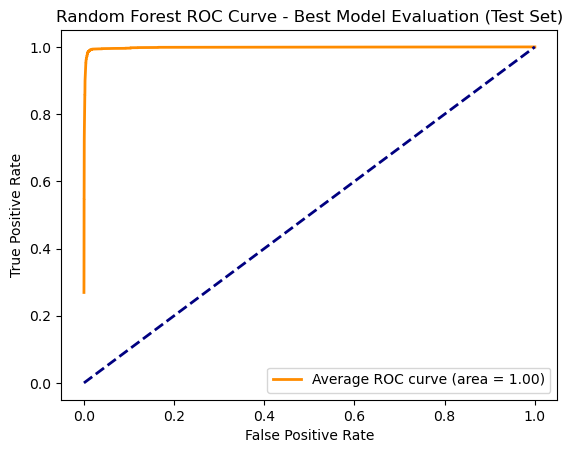

--- Random Forest - Best Model Evaluation (Validation Set) ---
Accuracy: 0.9891684013689447
Precision: 0.9889793253752283
Recall: 0.9891684013689447
F1-Score: 0.9890455668894699
Cross-validation scores: [[  352     4    66     6]
 [   13   506    62     8]
 [   41    36 26432    18]
 [   10     6    37   746]]
Average CV Score: 1771.4375

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.82      0.83       428
           1       0.92      0.86      0.89       589
           2       0.99      1.00      1.00     26527
           3       0.96      0.93      0.95       799

    accuracy                           0.99     28343
   macro avg       0.93      0.90      0.92     28343
weighted avg       0.99      0.99      0.99     28343

Confusion Matrix:
 [[  352     4    66     6]
 [   13   506    62     8]
 [   41    36 26432    18]
 [   10     6    37   746]]
ROC-AUC Score: 0.9980
Training Time: 225.12 seconds





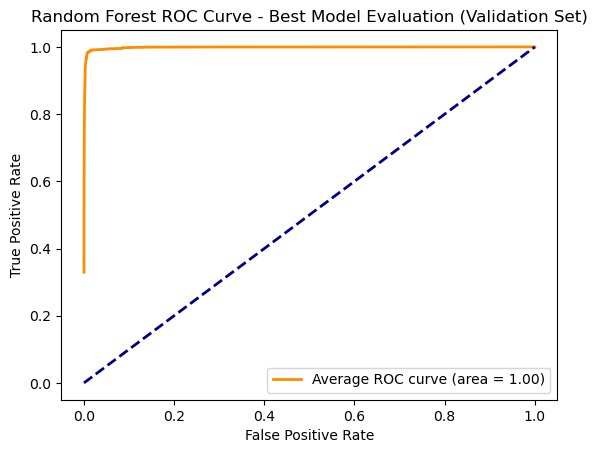

In [12]:
                                            ## STEP 11
                                ## Evaluation of the best parameters for Random Forset
                                ##########################################
                                ##Prerequisites : STEP 1 and Step 7

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import time
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Replace '?' with NaN (null) in the DataFrame
df.replace('?', pd.NA, inplace=True)

# Define selected features and target
selected_features = ['knowledge', 'opened_by', 'caller_id', 'number', 'active',
                     'sys_created_by', 'assigned_to', 'resolved_by', 'made_sla',
                     'sys_created_at', 'subcategory', 'u_priority_confirmation',
                     'closed_at', 'u_symptom', 'resolved_at', 'opened_at']
target = 'priority'

# Original DataFrame selection...
df_selected = df[selected_features + [target]]

# Process datetime features
df_selected = process_datetime_features(df_selected)

# Prepare data
df_selected = prepare_data(df_selected, target)

X = df_selected.drop(target, axis=1)
y = df_selected[target]

# Split the data into train, test, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Best parameters
best_params = {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': None, 'criterion': 'entropy'}

# Initialize the best model with the best parameters
rf_best_model = RandomForestClassifier(**best_params, random_state=42)

# Fit the best model on the training set
# Measure training time for test set
start_time_test = time.time()
rf_best_model.fit(X_train, y_train)
training_time_test = time.time() - start_time_test

# Predict on the test set
y_pred_test = rf_best_model.predict(X_test)
y_pred_proba_test = rf_best_model.predict_proba(X_test)  # For ROC curve

# Predict on the validation set
y_pred_val = rf_best_model.predict(X_val)
y_pred_proba_val = rf_best_model.predict_proba(X_val)  # For ROC curve

# Calculate metrics for test set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')
roc_auc_test = roc_auc_score(y_test, y_pred_proba_test, multi_class='ovr', average='weighted')
# Confusion matrix for validation set
conf_matrix_val = confusion_matrix(y_val, y_pred_val)

# Calculate metrics for validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
precision_val = precision_score(y_val, y_pred_val, average='weighted')
recall_val = recall_score(y_val, y_pred_val, average='weighted')
f1_val = f1_score(y_val, y_pred_val, average='weighted')
roc_auc_val = roc_auc_score(y_val, y_pred_proba_val, multi_class='ovr', average='weighted')
# Confusion matrix for test set
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Classification report and confusion matrix for test set
class_report_test = classification_report(y_test, y_pred_test)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Classification report and confusion matrix for validation set
class_report_val = classification_report(y_val, y_pred_val)
conf_matrix_val = confusion_matrix(y_val, y_pred_val)

# Number of classes for ROC curve
n_classes_test = len(np.unique(y_test))
n_classes_val = len(np.unique(y_val))

# Results tuple for test set
results_test = (accuracy_test, precision_test, recall_test, f1_test, conf_matrix_test, class_report_test, conf_matrix_test, roc_auc_test, training_time_test)

# Results tuple for validation set
results_val = (accuracy_val, precision_val, recall_val, f1_val, conf_matrix_val, class_report_val, conf_matrix_val, roc_auc_val, training_time_test)

# Print results for test set using the provided function
print_results("Random Forest - Best Model Evaluation (Test Set)", results_test)
# Plot ROC curve for test set
plot_multi_class_roc_curve(y_test, y_pred_proba_test, n_classes_test, "Random Forest ROC Curve - Best Model Evaluation (Test Set)")


# Print results for validation set using the provided function
print_results("Random Forest - Best Model Evaluation (Validation Set)", results_val)
# Plot ROC curve for validation set
plot_multi_class_roc_curve(y_val, y_pred_proba_val, n_classes_val, "Random Forest ROC Curve - Best Model Evaluation (Validation Set)")



In [13]:
                                            ## STEP 12
                                ## Hyperparameter Tuning for GBM
                                ##########################################
                                ##Prerequisites : STEP 1 and Step 7
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
import numpy as np
from imblearn.over_sampling import SMOTE

# Replace '?' with NaN (null) in the DataFrame
df.replace('?', pd.NA, inplace=True)

# Define selected features and target
selected_features = ['knowledge', 'opened_by', 'caller_id', 'number', 'active',
                     'sys_created_by', 'assigned_to', 'resolved_by', 'made_sla',
                     'sys_created_at', 'subcategory', 'u_priority_confirmation',
                     'closed_at', 'u_symptom', 'resolved_at', 'opened_at']
target = 'priority'

# Original DataFrame selection...
df_selected = df[selected_features + [target]]

# Process datetime features
df_selected = process_datetime_features(df_selected)

# Prepare data
df_selected = prepare_data(df_selected, target)

X = df_selected.drop(target, axis=1)
y = df_selected[target]

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameters to tune
gbm_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Gradient Boosting Classifier
gbm_model = GradientBoostingClassifier(random_state=42)

# Initialize RandomizedSearchCV
gbm_random_search = RandomizedSearchCV(estimator=gbm_model, param_distributions=gbm_params,
                                       n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
gbm_random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", gbm_random_search.best_params_)


/tmp/ipykernel_26068/1974463168.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = pd.to_datetime(df[feature], dayfirst=True)
/tmp/ipykernel_26068/1974463168.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature + '_year'] = df[feature].dt.year
/tmp/ipykernel_26068/1974463168.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/tmp/ipykernel_26068/1974463168.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = LabelEncoder().fit_transform(df[col])


[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time= 3.9min
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time= 4.0min
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time= 4.0min
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time= 4.1min
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time= 4.4min
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time= 4.5min
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time= 4.7min
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time= 4.7min
[CV] END learning_rate=0.01, max

/tmp/ipykernel_8196/3993617223.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = pd.to_datetime(df[feature], dayfirst=True)
/tmp/ipykernel_8196/3993617223.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature + '_year'] = df[feature].dt.year
/tmp/ipykernel_8196/3993617223.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

--- Gradient Boosting Machine - Best Model Evaluation (Test Set) ---
Accuracy: 0.9877566861901066
Precision: 0.9874970894091067
Recall: 0.9877566861901066
F1-Score: 0.9875477174710817
Cross-validation scores: [[  364    11    82    10]
 [    6   517    58     1]
 [   33    52 26397    18]
 [   10     3    63   717]]
Average CV Score: 1771.3750

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.78      0.83       467
           1       0.89      0.89      0.89       582
           2       0.99      1.00      0.99     26500
           3       0.96      0.90      0.93       793

    accuracy                           0.99     28342
   macro avg       0.93      0.89      0.91     28342
weighted avg       0.99      0.99      0.99     28342

Confusion Matrix:
 [[  364    11    82    10]
 [    6   517    58     1]
 [   33    52 26397    18]
 [   10     3    63   717]]
ROC-AUC Score: 0.9951
Training Time: 281.81 seconds





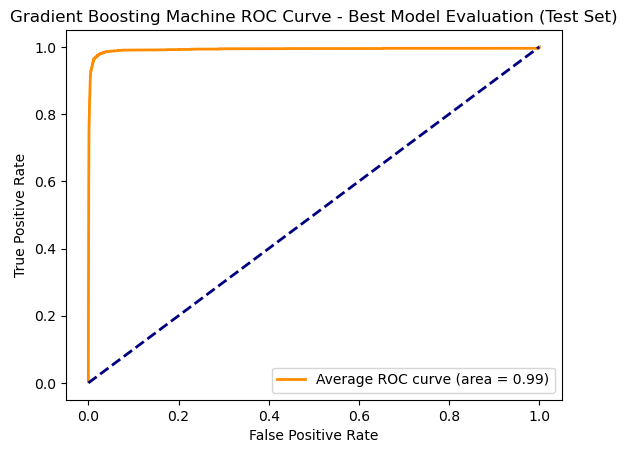

--- Gradient Boosting Machine - Best Model Evaluation (Validation Set) ---
Accuracy: 0.9882863493631584
Precision: 0.9880267678613837
Recall: 0.9882863493631584
F1-Score: 0.9880986881302939
Cross-validation scores: [[  341     5    76     6]
 [    7   520    57     5]
 [   33    43 26429    22]
 [    7     8    63   721]]
Average CV Score: 1771.4375

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.80      0.84       428
           1       0.90      0.88      0.89       589
           2       0.99      1.00      0.99     26527
           3       0.96      0.90      0.93       799

    accuracy                           0.99     28343
   macro avg       0.93      0.89      0.91     28343
weighted avg       0.99      0.99      0.99     28343

Confusion Matrix:
 [[  341     5    76     6]
 [    7   520    57     5]
 [   33    43 26429    22]
 [    7     8    63   721]]
ROC-AUC Score: 0.9955
Training Time: 281.81 seconds





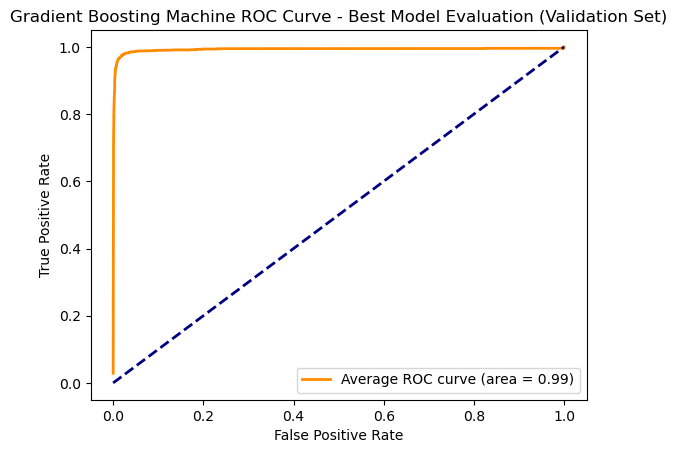

In [13]:
                                                    ## STEP 13
                                ## Evaluation of the best parameters for Gradient Boosting Machine (GBM)
                                ##########################################
                                ## Prerequisites: STEP 1 and Step 7

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import time
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Replace '?' with NaN (null) in the DataFrame
df.replace('?', pd.NA, inplace=True)

# Define selected features and target
selected_features = ['knowledge', 'opened_by', 'caller_id', 'number', 'active',
                     'sys_created_by', 'assigned_to', 'resolved_by', 'made_sla',
                     'sys_created_at', 'subcategory', 'u_priority_confirmation',
                     'closed_at', 'u_symptom', 'resolved_at', 'opened_at']
target = 'priority'

# Original DataFrame selection...
df_selected = df[selected_features + [target]]

# Process datetime features
df_selected = process_datetime_features(df_selected)

# Prepare data
df_selected = prepare_data(df_selected, target)

X = df_selected.drop(target, axis=1)
y = df_selected[target]

# Split the data into train, test, and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Best parameters for GBM
best_params_gbm = {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 5, 'learning_rate': 0.2}

# Initialize the best GBM model with the best parameters
gbm_best_model = GradientBoostingClassifier(**best_params_gbm, random_state=42)

# Fit the best model on the training set
# Measure training time for test set
start_time_test_gbm = time.time()
gbm_best_model.fit(X_train, y_train)
training_time_test_gbm = time.time()-start_time_test_gbm

# Predict on the test set
y_pred_test_gbm = gbm_best_model.predict(X_test)
y_pred_proba_test_gbm = gbm_best_model.predict_proba(X_test)  # For ROC curve

# Predict on the validation set
y_pred_val_gbm = gbm_best_model.predict(X_val)
y_pred_proba_val_gbm = gbm_best_model.predict_proba(X_val)  # For ROC curve

# Calculate metrics for test set
accuracy_test_gbm = accuracy_score(y_test, y_pred_test_gbm)
precision_test_gbm = precision_score(y_test, y_pred_test_gbm, average='weighted')
recall_test_gbm = recall_score(y_test, y_pred_test_gbm, average='weighted')
f1_test_gbm = f1_score(y_test, y_pred_test_gbm, average='weighted')
roc_auc_test_gbm = roc_auc_score(y_test, y_pred_proba_test_gbm, multi_class='ovr', average='weighted')
# Confusion matrix for validation set
conf_matrix_val_gbm = confusion_matrix(y_val, y_pred_val_gbm)

# Calculate metrics for validation set
accuracy_val_gbm = accuracy_score(y_val, y_pred_val_gbm)
precision_val_gbm = precision_score(y_val, y_pred_val_gbm, average='weighted')
recall_val_gbm = recall_score(y_val, y_pred_val_gbm, average='weighted')
f1_val_gbm = f1_score(y_val, y_pred_val_gbm, average='weighted')
roc_auc_val_gbm = roc_auc_score(y_val, y_pred_proba_val_gbm, multi_class='ovr', average='weighted')
# Confusion matrix for test set
conf_matrix_test_gbm = confusion_matrix(y_test, y_pred_test_gbm)

# Classification report and confusion matrix for test set
class_report_test_gbm = classification_report(y_test, y_pred_test_gbm)
conf_matrix_test_gbm = confusion_matrix(y_test, y_pred_test_gbm)

# Classification report and confusion matrix for validation set
class_report_val_gbm = classification_report(y_val, y_pred_val_gbm)
conf_matrix_val_gbm = confusion_matrix(y_val, y_pred_val_gbm)

# Number of classes for ROC curve
n_classes_test_gbm = len(np.unique(y_test))
n_classes_val_gbm = len(np.unique(y_val))

# Results tuple for test set
results_test_gbm = (accuracy_test_gbm, precision_test_gbm, recall_test_gbm, f1_test_gbm, conf_matrix_test_gbm, class_report_test_gbm, conf_matrix_test_gbm, roc_auc_test_gbm, training_time_test_gbm)

# Results tuple for validation set
results_val_gbm = (accuracy_val_gbm, precision_val_gbm, recall_val_gbm, f1_val_gbm, conf_matrix_val_gbm, class_report_val_gbm, conf_matrix_val_gbm, roc_auc_val_gbm, training_time_test_gbm)

# Print results for test set using the provided function
print_results("Gradient Boosting Machine - Best Model Evaluation (Test Set)", results_test_gbm)
# Plot ROC curve for test set
plot_multi_class_roc_curve(y_test, y_pred_proba_test_gbm, n_classes_test_gbm, "Gradient Boosting Machine ROC Curve - Best Model Evaluation (Test Set)")

# Print results for validation set using the provided function
print_results("Gradient Boosting Machine - Best Model Evaluation (Validation Set)", results_val_gbm)
# Plot ROC curve for validation set
plot_multi_class_roc_curve(y_val, y_pred_proba_val_gbm, n_classes_val_gbm, "Gradient Boosting Machine ROC Curve - Best Model Evaluation (Validation Set)")
